In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Surpress Futurewarnings messages due to seaborn incompatibilities
warnings.filterwarnings("ignore",category=FutureWarning)

1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome



### Generate 10,000 random samples of flipping 3 coins

In [17]:

n_sample = 10000
flip_coin1 = np.random.binomial(1, 0.5, size=n_sample)
flip_coin2 = np.random.binomial(1, 0.5, size=n_sample)
flip_coin3 = np.random.binomial(1, 0.5, size=n_sample)
sample = [ flip_coin1, flip_coin2,flip_coin3 ]


            



#### Plot the probability distribution of getting 0, 1, 2, or 3 heads

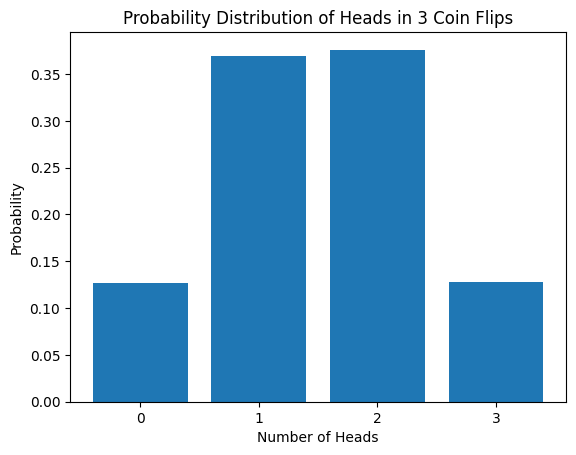

Empirical Expected Value: 1.5057
Theoretical Probabilities: [0.12499999999999999, 0.37500000000000033, 0.3750000000000003, 0.125]

Comparison of Empirical vs Theoretical Probabilities:
k=0: Empirical=0.1266, Theoretical=0.1250, |Difference|=0.0016
k=1: Empirical=0.3693, Theoretical=0.3750, |Difference|=0.0057
k=2: Empirical=0.3759, Theoretical=0.3750, |Difference|=0.0009
k=3: Empirical=0.1282, Theoretical=0.1250, |Difference|=0.0032

Sum of Theoretical Probabilities: 1.0000000000000007


In [41]:
total_heads = flip_coin1 + flip_coin2 + flip_coin3
heads_counts = np.bincount(total_heads, minlength=4)
probabilities = heads_counts / n_sample

plt.bar(range(4), probabilities)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution of Heads in 3 Coin Flips')
plt.xticks(range(4))
plt.show()

expected_value = np.mean(total_heads)
print(f"Empirical Expected Value: {expected_value}")

# Theoretical probabilities for binomial(3, 0.5)
theoretical_probs = [st.binom.pmf(k, 3, 0.5) for k in range(4)]
print("Theoretical Probabilities:", theoretical_probs)

print("\nComparison of Empirical vs Theoretical Probabilities:")
for k in range(4):
    emp = probabilities[k]
    theo = theoretical_probs[k]
    diff = abs(emp - theo)
    print(f"k={k}: Empirical={emp:.4f}, Theoretical={theo:.4f}, |Difference|={diff:.4f}")

print(f"\nSum of Theoretical Probabilities: {sum(theoretical_probs)}")

2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

In [ ]:
import numpy as np
sample_a = np.random.normal(70, 5, 100)  # mean=70, std=5, n=100
sample_b = np.random.normal(73, 5, 100)  # mean=73, std=5, n=100

/var/folders/w2/svppx15n0q1f6269nrsbflrr0000gn/T/ipykernel_1222/3881970159.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sample_a, sample_a], labels=['Test Score 1', 'Test Score 2'])


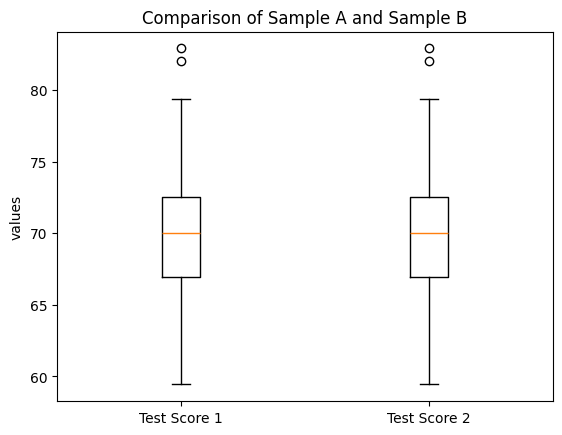

In [10]:
plt.boxplot([sample_a, sample_a], labels=['Test Score 1', 'Test Score 2'])
plt.ylabel('values')
plt.title('Comparison of Sample A and Sample B')

plt.show()

In [13]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(sample_a, sample_b, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -3.771728968709912
p-value: 0.00021639474763444826


p = 0.000216

This is far below 0.05

Also below 0.01 and even 0.001

👉 Strong statistical evidence that the two sample means are different.

Sample A: Mean = 69.98, 95% CI = (69.09, 70.88)
Sample B: Mean = 72.70, 95% CI = (71.59, 73.80)


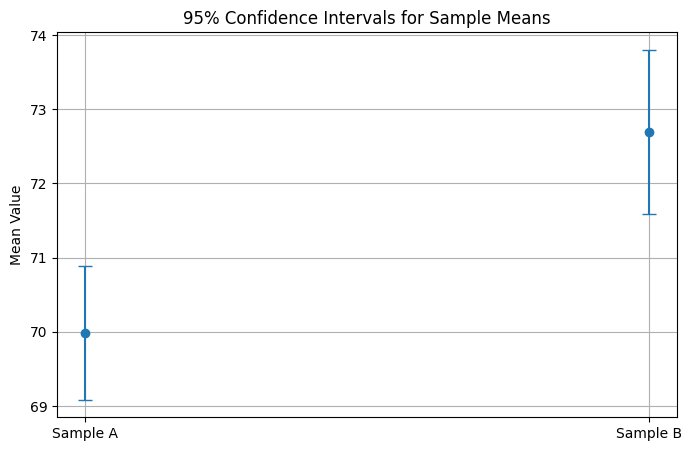

In [14]:
from scipy.stats import t

# Calculate 95% confidence intervals for the means of sample_a and sample_b

n_a = len(sample_a)
mean_a = np.mean(sample_a)
std_a = np.std(sample_a, ddof=1)
ci_a = t.interval(0.95, df=n_a-1, loc=mean_a, scale=std_a/np.sqrt(n_a))

n_b = len(sample_b)
mean_b = np.mean(sample_b)
std_b = np.std(sample_b, ddof=1)
ci_b = t.interval(0.95, df=n_b-1, loc=mean_b, scale=std_b/np.sqrt(n_b))

print(f"Sample A: Mean = {mean_a:.2f}, 95% CI = ({ci_a[0]:.2f}, {ci_a[1]:.2f})")
print(f"Sample B: Mean = {mean_b:.2f}, 95% CI = ({ci_b[0]:.2f}, {ci_b[1]:.2f})")

# Visualize the confidence intervals
plt.figure(figsize=(8, 5))
plt.errorbar(['Sample A', 'Sample B'], [mean_a, mean_b], yerr=[(ci_a[1]-ci_a[0])/2, (ci_b[1]-ci_b[0])/2], fmt='o', capsize=5)
plt.ylabel('Mean Value')
plt.title('95% Confidence Intervals for Sample Means')
plt.grid(True)
plt.show()

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

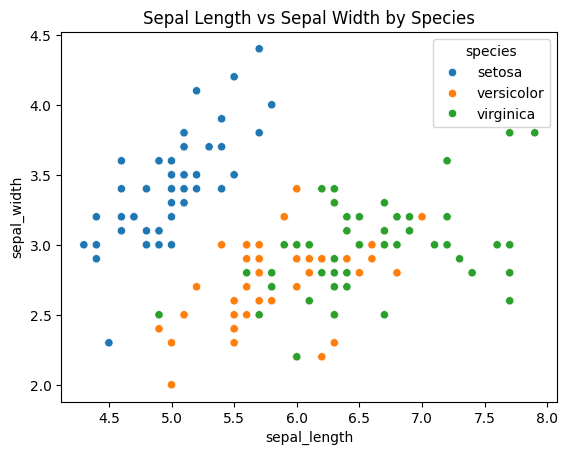

In [16]:

penguins = sns.load_dataset('iris').dropna()

sns.scatterplot(data=penguins, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

In [17]:
from scipy.stats import pearsonr

# Load iris dataset (already loaded as 'penguins')
iris = penguins

# Pair 1: Sepal length and Petal length
corr_sl_pl, p_sl_pl = pearsonr(iris['sepal_length'], iris['petal_length'])
r2_sl_pl = corr_sl_pl ** 2

print("Sepal Length vs Petal Length:")
print(f"Pearson Correlation: {corr_sl_pl:.4f}")
print(f"P-value: {p_sl_pl:.4f}")
print(f"R-squared: {r2_sl_pl:.4f}")

# Pair 2: Sepal width and Petal width
corr_sw_pw, p_sw_pw = pearsonr(iris['sepal_width'], iris['petal_width'])
r2_sw_pw = corr_sw_pw ** 2

print("\nSepal Width vs Petal Width:")
print(f"Pearson Correlation: {corr_sw_pw:.4f}")
print(f"P-value: {p_sw_pw:.4f}")
print(f"R-squared: {r2_sw_pw:.4f}")

# By species
species_list = iris['species'].unique()
for species in species_list:
    subset = iris[iris['species'] == species]
    corr_sl_pl_s, p_sl_pl_s = pearsonr(subset['sepal_length'], subset['petal_length'])
    corr_sw_pw_s, p_sw_pw_s = pearsonr(subset['sepal_width'], subset['petal_width'])
    print(f"\n{species.capitalize()}:")
    print(f"  Sepal L vs Petal L: Corr={corr_sl_pl_s:.4f}, P={p_sl_pl_s:.4f}")
    print(f"  Sepal W vs Petal W: Corr={corr_sw_pw_s:.4f}, P={p_sw_pw_s:.4f}")

# Interpretation: Sepal length and petal length show a stronger relationship (higher |corr|) as they are more linearly related in flower morphology.

Sepal Length vs Petal Length:
Pearson Correlation: 0.8718
P-value: 0.0000
R-squared: 0.7600

Sepal Width vs Petal Width:
Pearson Correlation: -0.3661
P-value: 0.0000
R-squared: 0.1340

Setosa:
  Sepal L vs Petal L: Corr=0.2672, P=0.0607
  Sepal W vs Petal W: Corr=0.2328, P=0.1038

Versicolor:
  Sepal L vs Petal L: Corr=0.7540, P=0.0000
  Sepal W vs Petal W: Corr=0.6640, P=0.0000

Virginica:
  Sepal L vs Petal L: Corr=0.8642, P=0.0000
  Sepal W vs Petal W: Corr=0.5377, P=0.0001


Vericolor and Virginca are more closely related